# Предобработка признаков, pandas


Дибель Софья Васильевна, НПМбд-01-19а

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [311]:
def max_element(arr):
    
    # Удаляем первый элемент, если он ненулевой
    if arr[0] != 0:
        arr = arr[1:]

    # Массив с индексами ненулевых элементов
    nonzeros_indices = np.nonzero(arr)[0]  # np.nonzero() returns a tuple of arrays, one for each dimension of arr

    if len(nonzeros_indices) == len(arr):
        return None
    
    # Булевый массив: стоит ли перед ненулевым элементом нулевой?
    nonzero_before_zero = arr[nonzeros_indices - 1] == 0

    return arr[nonzeros_indices[nonzero_before_zero]].max()

In [315]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [316]:
def nearest_value(X, v):
    X = X.astype("float")  # элементы матрицы стали типа float
    X_dist = np.abs(np.abs(X) - v)  # матрица расстояний от элементов до v
    min_dist = np.argmin(X_dist)  # "сглаживает" многомерный массив как бы в 1D-массив, возвращает индекс min элемента
    return X[min_dist // X.shape[1], min_dist % X.shape[1]]

In [317]:
X = np.arange(0,10).reshape((5, 2))
v = 3.6

nearest_value(X, v)

4.0

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [184]:
def scale(X):
    X = X.astype("float")
    
    m = np.mean(X, axis=1)
    s = np.std(X, axis=1)

    if np.count_nonzero(s) == s.shape[0]:
        X = (X.T - m).T
        X = (X.T / s).T
        return X
    else:
        return "Деление на 0"

In [185]:
A = np.random.randint(-5, 16, (4, 5))
A

array([[14,  9, 13, -2, -4],
       [-1,  7, 10,  9,  5],
       [ 5, -3,  3, -5,  8],
       [ 4, -1,  6, 10,  0]])

In [186]:
scale(A)

array([[ 1.05777177,  0.39666441,  0.9255503 , -1.05777177, -1.32221471],
       [-1.79546212,  0.25649459,  1.02597835,  0.76948376, -0.25649459],
       [ 0.69634713, -0.94211671,  0.28673117, -1.35173267,  1.31077107],
       [ 0.04975186, -1.19404463,  0.54727045,  1.54230764, -0.94528533]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [197]:
def get_stats(X):
    print("Определитель: ", np.linalg.det(X))
    print("След: ", np.trace(X))
    print("Наибольший элемент: ", X.max())
    print("Наименьший элемент: ", X.min())
    print("Норма Фробениуса: ", np.linalg.norm(X, ord='fro'))
    print("Собственные числа: ", np.linalg.eig(X)[0])
    print("Обратная матрица: ", '\n', np.linalg.inv(X))

In [195]:
B = np.random.normal(10, 1, (3, 3))
B

array([[ 9.59766795, 11.06061688, 10.09842469],
       [10.68544508, 10.12396281,  9.95430967],
       [10.99317723,  9.24782294,  8.51169398]])

In [198]:
get_stats(B)

Определитель:  21.909614669870642
След:  28.23332473665195
Наибольший элемент:  11.060616880742534
Наименьший элемент:  8.511693979538046
Норма Фробениуса:  30.18299864058414
Собственные числа:  [30.12396172 -1.35313201 -0.53750497]
Обратная матрица:  
 [[-0.26854056 -0.0345119   0.35896248]
 [ 0.84338553 -1.33828734  0.56450119]
 [-0.56949488  1.49860179 -0.95945005]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [319]:
max_elem = np.array([])
for exp_num in range(100):
    C1, C2 = np.random.normal(10, 1, (10, 10)), np.random.normal(10, 1, (10, 10))
    C1_C2 = C1.dot(C2)
    max_elem = np.append(max_elem, np.max(C1_C2))

print("Cреднее значение по экспериментам у максимальных элементов:", np.mean(max_elem))
print('95-процентная квантиль:', np.quantile(max_elem, 0.95))   

Cреднее значение по экспериментам у максимальных элементов: 1102.499348003602
95-процентная квантиль: 1142.5682688620395


### Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [321]:
import pandas as pd
%matplotlib inline

In [1197]:
db = pd.read_csv('2008.csv')

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [1198]:
db['CancellationCode'].value_counts().idxmax()  # pd.idmax - not maximum, but index of the maximum value

'A'

Самой частой причиной был код "A" = carrier (перевозчик)

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [1199]:
print('Среднее пройденное расстояние:', db['Distance'].mean())
print('Максимальное пройденное расстояние:', db['Distance'].max())
print('Минимальное пройденное расстояние:', db['Distance'].min())

Среднее пройденное расстояние: 724.5082571428571
Максимальное пройденное расстояние: 4962
Минимальное пройденное расстояние: 31


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [1200]:
db[db['Distance'] == db['Distance'].min()][['Year', 'Month', 'DayofMonth', 'FlightNum', 'Dest', 'Distance']].sort_values(['Year', 'Month', 'DayofMonth'], axis=0)

,Year,Month,DayofMonth,FlightNum,Dest,Distance
48112,2008,2,28,64,WRG,31
27534,2008,3,11,64,WRG,31
46082,2008,8,9,65,PSG,31
17349,2008,8,18,64,WRG,31
6958,2008,12,26,65,PSG,31
1116,2008,12,30,65,PSG,31


Минимально пройденное расстояние выглядит подозрительно. Все рейсы с таким пройденным расстоянием были совершены в разные месяцы на рейсах 64 и 65.

Взяли рейсы 64 и 65; слева - пройденное расстояние, справа - кол-во рейсов, которые это расстояние прошли.

In [1201]:
db[(db['FlightNum'] == 64) | (db['FlightNum'] == 65)]['Distance'].value_counts()

1747    12
82      11
1005     9
123      6
31       6
571      6
680      5
581      4
372      4
533      4
2454     3
2381     2
359      1
682      1
883      1
414      1
281      1
386      1
Name: Distance, dtype: int64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

Больше всего вылетов было произведено из города:

In [1203]:
db['Origin'].value_counts().idxmax()

'ATL'

ATL - Атланта

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

Среднее время полета (AirTime) по всем вылетевшим из аэропорта рейсам:

In [1204]:
db.groupby('Origin')['AirTime'].mean()

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 297, dtype: float64

Наибольшее среднее время полета имеет аэропорт:

In [1207]:
db.groupby('Origin')['AirTime'].mean().idxmax()

'SJU'

SJU - Puerto Rico

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [1208]:
# аэропорт и кол-во рейсов
all_ap = db.groupby('Origin').filter(lambda x: len(x) >= 1000).groupby('Origin').size()
# аэропорт и кол-во задержанных рейсов
all_ap_delay = db.groupby('Origin').filter(lambda x: len(x) >= 1000)[db['DepDelay'] > 0].groupby('Origin').size()

p = all_ap_delay / all_ap
p.idxmax()

<ipython-input-1208-6cba32b4062f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_ap_delay = db.groupby('Origin').filter(lambda x: len(x) >= 1000)[db['DepDelay'] > 0].groupby('Origin').size()


'EWR'

EWR - Newark

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [1209]:
db.shape

(70000, 29)

В данных имеются пропущенные значения:

In [1210]:
# By calling any() from the result of isnull(), 
# you can check if each row and column contains at least one missing value. True = contains.
db.isnull().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime               True
CRSDepTime           False
ArrTime               True
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin               False
Dest                 False
Distance             False
TaxiIn                True
TaxiOut               True
Cancelled            False
CancellationCode      True
Diverted             False
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [1211]:
print('Всего пропущенных элементов:', db.isnull().sum().sum())
# By default, any() is applied to columns. If the argument axis=1, it is applied to rows.
print('Кол-во объектов, имеющих хотя бы один пропуск:', db.isnull().any(axis=1).sum())
print('Кол-во признаков, имеющих хотя бы один пропуск:', db.isnull().any(axis=0).sum())

Всего пропущенных элементов: 355215
Кол-во объектов, имеющих хотя бы один пропуск: 70000
Кол-во признаков, имеющих хотя бы один пропуск: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?  **Да**
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

Первые 15 объектов с пропущенными данными в целевой переменной:

In [1212]:
db[db['DepDelay'].isnull()].head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
194,2008,1,28,1,NaN,1640,NaN,1719,UA,753,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
204,2008,6,13,5,NaN,1229,NaN,1421,OH,5765,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
236,2008,7,19,6,NaN,544,NaN,917,OO,6151,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
257,2008,4,19,6,NaN,1345,NaN,1435,AA,1853,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
267,2008,9,23,2,NaN,1400,NaN,1515,WN,2049,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Кол-во пропущенных элементов в признаке DepDelay:

In [1213]:
db['DepDelay'].isnull().sum()

1399

Сумма пропусков по признакам:

In [1214]:
db[db.isnull()['DepDelay']].isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime              1399
CRSDepTime              0
ArrTime              1399
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum               820
ActualElapsedTime    1399
CRSElapsedTime          4
AirTime              1399
ArrDelay             1399
DepDelay             1399
Origin                  0
Dest                    0
Distance                0
TaxiIn               1399
TaxiOut              1399
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay         1399
WeatherDelay         1399
NASDelay             1399
SecurityDelay        1399
LateAircraftDelay    1399
dtype: int64

Во всех элементах, где нет информации про DepDelay, также нет никакой другой информации про время.

Кол-во отмененных рейсов среди тех, где нет инф. про DepDelay:

In [1215]:
db[db.isnull()['DepDelay']]['Cancelled'].sum()

1399

Отмененные рейсы, у которых ЕСТЬ информация по DepDelay:

In [1216]:
db[(db['Cancelled'] == 1) & (db['DepDelay'].isnull() == False)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5976,2008,11,29,6,1325.0,1301,NaN,1354,EV,5401,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
15680,2008,12,19,5,954.0,935,NaN,1252,XE,2573,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
16382,2008,12,6,6,1806.0,1728,NaN,1827,OO,5790,...,NaN,11.0,1,B,0,NaN,NaN,NaN,NaN,NaN
20622,2008,10,7,2,844.0,845,NaN,1039,YV,7302,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
22462,2008,12,17,3,2132.0,2134,NaN,2232,YV,2859,...,NaN,28.0,1,B,0,NaN,NaN,NaN,NaN,NaN
30057,2008,12,9,2,1358.0,1330,NaN,1700,OO,2874,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
33611,2008,10,11,6,826.0,830,NaN,1015,OO,3721,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
37581,2008,12,3,3,2234.0,2235,NaN,2318,OO,5426,...,NaN,16.0,1,B,0,NaN,NaN,NaN,NaN,NaN
40343,2008,11,10,1,1440.0,1445,NaN,1731,EV,5309,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
50401,2008,11,29,6,2232.0,2234,NaN,11,OO,6412,...,NaN,21.0,1,B,0,NaN,NaN,NaN,NaN,NaN


Отмененных рейсов, у которых ЕСТЬ информация по DepDelay, 12 штук:

In [1217]:
db[(db['Cancelled'] == 1) & (db['DepDelay'].isnull() == False)].shape[0]

12

Всего перелетов, у которых есть информация по DepDelay:

In [1218]:
db[db['DepDelay'].isnull() == False].shape[0]

68601

Вывод: число 12 слишком мало против 68601 (все остальные рейсы не были отменены) => можно удалить признак Cancelled, вместе с ним CancellationCode.

Количество пропусков по другим признакам при условии, что информация по DepDelay присутствует:

In [1219]:
db[(db['DepDelay'].isnull() == False)].isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                157
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      183
CRSElapsedTime           5
AirTime                183
ArrDelay               183
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 157
TaxiOut                  7
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         53348
WeatherDelay         53348
NASDelay             53348
SecurityDelay        53348
LateAircraftDelay    53348
dtype: int64

Так как в 53348 строках из 68601 (78%) отсутствует информация о CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, можно исключить и эти признаки.

Исключили из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0, а также исключили признаки Cancelled, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay. Выделили целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [1220]:
sample = db[(db['DepDelay'].isnull() == False) & (db['DepDelay'] != 0)]
sample = sample.drop(['Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 
                      'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis='columns')

# reset_index: we can use the drop parameter to avoid the old index being added as a column
sample = sample.reset_index(drop=True)
delay = sample['DepDelay'].values
sample = sample.drop('DepDelay', axis='columns')
sample

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0,0
63400,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0
63401,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0
63402,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [1221]:
def get_hh(time):
    if np.isnan(time):
        return np.nan
    time = int(time)
    if time // 100 < 1:
        return np.nan
    else:
        return int(str(time)[:-2])

def get_mm(time):
    if np.isnan(time):
        return np.nan
    time = int(time)
    if time // 100 < 1:
        return np.nan
    else:
        return int(str(time)[-2:])

In [1222]:
for item in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    item_Hour = item + '_Hour'
    item_Minute = item + '_Minute'
    sample[item_Hour] = np.array(sample[item].apply(get_hh))
    sample[item_Minute] = np.array(sample[item].apply(get_mm))
    sample = sample.drop(item, axis=1)

In [1223]:
sample.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Diverted', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

In [1224]:
sample.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Diverted               int64
DepTime_Hour         float64
DepTime_Minute       float64
CRSDepTime_Hour      float64
CRSDepTime_Minute    float64
ArrTime_Hour         float64
ArrTime_Minute       float64
CRSArrTime_Hour      float64
CRSArrTime_Minute    float64
dtype: object

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [1225]:
sample = sample.drop(['TailNum', 'Year'], axis=1)

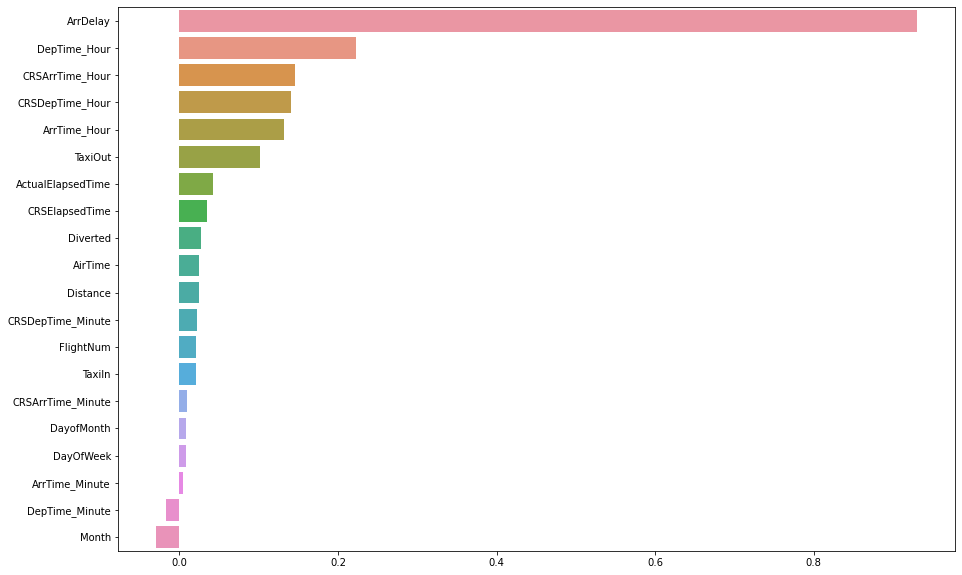

In [1226]:
numerical_data = sample.select_dtypes([np.number])
numerical_data_mean = numerical_data.mean()
numerical_features = numerical_data.columns

numerical_data = numerical_data.fillna(numerical_data_mean)

correlations = {
    feature: np.corrcoef(numerical_data[feature], delay)[0][1] for feature in numerical_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

Сильно коррелирует признак ArrDelay (0,95), удалим его:

In [1227]:
sample = sample.drop('ArrDelay', axis=1)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

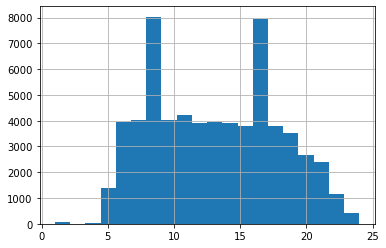

In [1228]:
sample['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

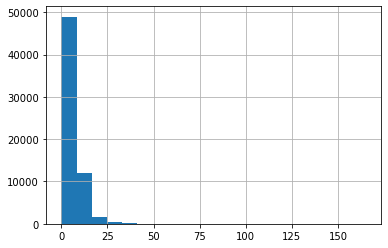

In [1229]:
sample['TaxiIn'].hist(bins=20)

<AxesSubplot:>

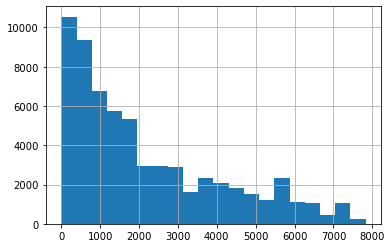

In [1230]:
sample['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Данные сильно "разбросаны". Полученные данные содержат в совокупности признаки разного размера и масштаба. Различные масштабы функций данных отрицательно влияют на моделирование набора данных.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [1231]:
from sklearn.preprocessing import StandardScaler

In [1232]:
def transform_data(data):
    
    # Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных
    numerical_data = data.select_dtypes(np.number).columns
    categorical_data = data.select_dtypes(object).columns
    data[numerical_data] = data[numerical_data].fillna(0)
    data[categorical_data] = data[categorical_data].fillna('nan')
    
    # Масштабирование вещественных признаков с помощью StandardScaler
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    data[numerical_data] = scaler.fit_transform(data[numerical_data])
    
    # One-hot-кодирование категориальных признаков с помощью DictVectorizer или функции pd.get_dummies
    categorical_data_encoded = pd.get_dummies(data[categorical_data])
    data = pd.concat([data, categorical_data_encoded], axis=1)
    
    data.drop(categorical_data, axis=1, inplace=True)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [1233]:
sample = transform_data(sample)

In [1234]:
sample

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [1235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample, delay, test_size = 0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.


$R^2$ - "разница" между выборками в наборе данных и прогнозами, сделанными моделью (обычный: от 0 до 1, 1 - идеально; скорректированный: теоретически может быть и меньше нуля (только при очень маленьком значении обычного коэффициента детерминации и большом количестве факторов))

In [1237]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1238]:
# train - подвыборка (на чем учим)
# test - контрольная выборка (что учим)

X_train = X_train[:1000]
y_train = y_train[:1000]

LR = LinearRegression().fit(X_train, y_train)

# подвыборка
y_train_predict = LR.predict(X_train)
R2_1 = r2_score(y_train, y_train_predict)  
MSE_1 = mean_squared_error(y_train, y_train_predict)

# контрольная выборка
y_test_predict = LR.predict(X_test)
R2_2 = r2_score(y_test, y_test_predict)
MSE_2 = mean_squared_error(y_test, y_test_predict)

In [1239]:
print('MSE подвыборки:', MSE_1, '\n' 'MSE контрольной выборки:', MSE_2, '\n' 'R^2 подвыборки:', R2_1, 
     '\n' 'R^2 контрольной выборки:', R2_2)

MSE подвыборки: 565.6794391026885 
MSE контрольной выборки: 1542.8430701881093 
R^2 подвыборки: 0.466247838346479 
R^2 контрольной выборки: -0.15338182490346708


In [1240]:
LR.coef_

array([-8.08354983e-01, -1.96010891e-01,  1.03842497e+00,  1.68621197e+00,
        7.38013993e+01,  2.53839445e+01, -7.86255064e+01, -1.50540485e+01,
       -4.21704385e+00, -7.65668340e+00, -2.31955232e+00,  2.72763562e+01,
        1.24861153e+00, -1.18475799e+01, -2.63465675e+00, -1.86319479e+01,
        1.34124477e-01,  7.71973993e+00,  2.04633900e+00, -1.56787322e+01,
        6.16979595e+00,  1.42108547e-13, -1.77433626e+00,  7.85654010e+00,
        1.43827162e+01, -1.15934875e-01,  4.71831690e+00,  1.30365603e+01,
       -3.03337663e+00, -3.13385161e+01, -6.32061603e+00, -1.28286049e+01,
        1.92356699e+01, -2.45370038e+00,  1.25282002e+01,  8.00136531e-01,
        7.76517958e+00, -1.06646513e+01, -2.28464687e+00,  5.06261699e-14,
        1.42284913e+02, -6.30696295e+00,  2.58683267e+01, -1.16351373e-13,
       -4.61852778e-14, -4.93031545e+01, -1.31450406e-13, -2.66453526e-14,
       -5.68434189e-14,  1.31450406e-13,  1.38555833e-13,  6.39488462e-14,
       -6.90995271e+00,  

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [1241]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [1242]:
lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
print("Нулевые коэффициенты для модели Lasso:", np.sum(np.abs(lasso.coef_) == 0))
print("Нулевые коэффициенты для модели Ridge:", np.sum(np.abs(ridge.coef_) == 0))

Нулевые коэффициенты для модели Lasso: 626
Нулевые коэффициенты для модели Ridge: 280


In [1243]:
alphas = np.logspace(-3, 3, 20)  # Return numbers spaced evenly on a log scale.

lasso_not_zeros = np.array([])
ridge_not_zeros = np.array([])

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=100000)
    lasso.fit(X_train, y_train)
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    lasso_not_zeros = np.append(lasso_not_zeros, np.sum(np.abs(lasso.coef_) != 0))
    ridge_not_zeros = np.append(ridge_not_zeros, np.sum(np.abs(ridge.coef_) != 0))

In [1244]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ridge regularization')

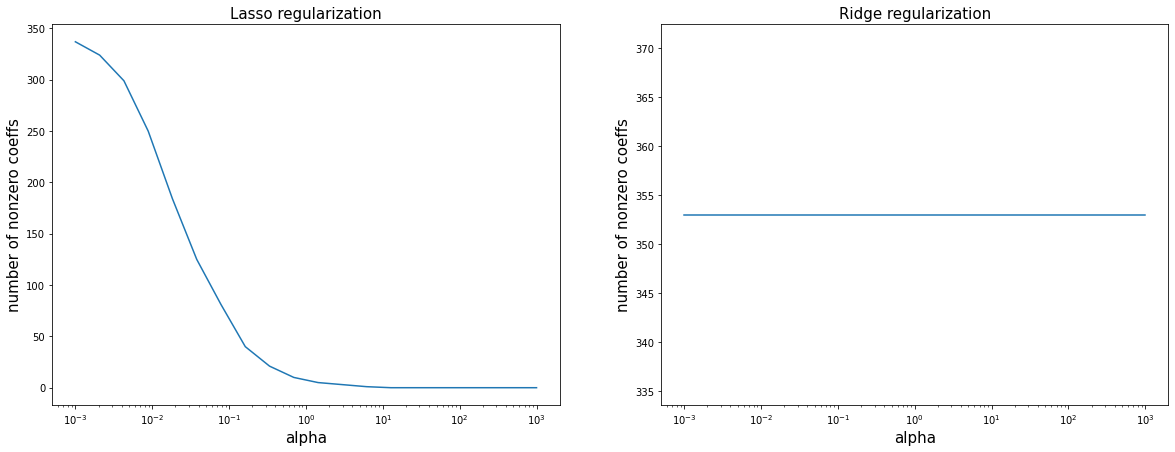

In [1245]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(alphas, lasso_not_zeros)
ax[0].set_xscale('log')
ax[0].set_xlabel("alpha", fontsize=15)
ax[0].set_ylabel("number of nonzero coeffs", fontsize=15)
ax[0].set_title("Lasso regularization", fontsize=15)


ax[1].plot(alphas, ridge_not_zeros)
ax[1].set_xscale('log')
ax[1].set_xlabel("alpha", fontsize=15)
ax[1].set_ylabel("number of nonzero coeffs", fontsize=15)
ax[1].set_title("Ridge regularization", fontsize=15)

В Lasso кол-во ненулевых коэфф уменьшается, в Ridge кол-во константное.

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [1254]:
def get_metrics_ridge(X_train, y_train, X_test, y_test, alpha=1):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_test_predict = ridge.predict(X_test)
    RMSE = mean_squared_error(y_test, y_test_predict, squared=False)
    MAE = mean_absolute_error(y_test, y_test_predict)
    R2 = r2_score(y_test, y_test_predict)
    return RMSE, MAE, R2

RMSE, MAE, R2 = get_metrics_ridge(X_train, y_train, X_test, y_test)
print('Метрики для Ridge-регрессии:')
print(f'RMSE: {RMSE}\nMAE: {MAE}\nR2:{R2}')

Метрики для Ridge-регрессии:
RMSE: 37.23000333665353
MAE: 20.606157935044266
R2:-0.03618547362101321


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [1256]:
from sklearn.model_selection import GridSearchCV

In [1257]:
parametrs = {'alpha': alphas}

In [1259]:
def optimize(scoring, X_train, y_train):
    alphas = np.logspace(-3, 3, 20)
    searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring=scoring, cv=5)
    searcher.fit(X_train, y_train)
    best_alpha = searcher.best_params_['alpha']
    return best_alpha, alphas, -searcher.cv_results_["mean_test_score"]

Лучший коэффициент регуляризации для neg_root_mean_squared_error = 54.555947811685144


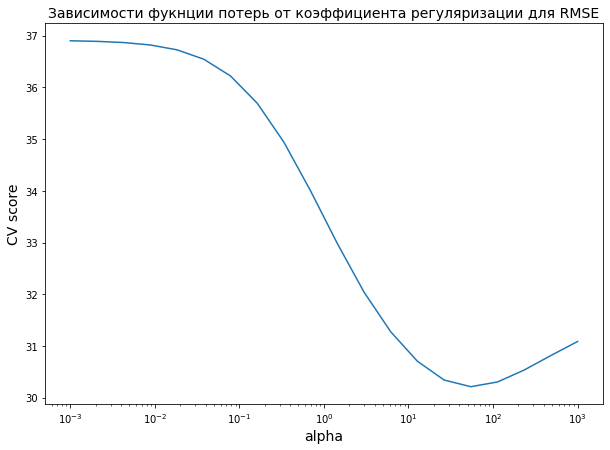

In [1269]:
best_alpha_RMSE, xx, yy = optimize('neg_root_mean_squared_error', X_train, y_train)
plt.figure(figsize=(10, 7))
plt.plot(xx, yy)
plt.xscale("log")
plt.title('Зависимости фукнции потерь от коэффициента регуляризации для RMSE', fontsize=14)
plt.xlabel('alpha', fontsize=14)
plt.ylabel('CV score', fontsize=14)
print('Лучший коэффициент регуляризации для neg_root_mean_squared_error =', best_alpha_RMSE)

Лучший коэффициент регуляризации для neg_mean_absolute_error = 112.88378916846884


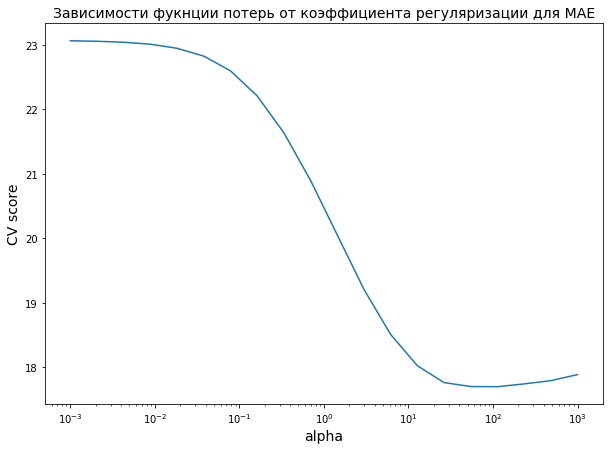

In [1270]:
best_alpha_MAE, xx, yy = optimize('neg_mean_absolute_error', X_train, y_train)
plt.figure(figsize=(10, 7))
plt.plot(xx, yy)
plt.xscale("log")
plt.title('Зависимости фукнции потерь от коэффициента регуляризации для MAE', fontsize=14)
plt.xlabel('alpha', fontsize=14)
plt.ylabel('CV score', fontsize=14)
print('Лучший коэффициент регуляризации для neg_mean_absolute_error =', best_alpha_MAE)

Лучший коэффициент регуляризации для R2 = 54.555947811685144


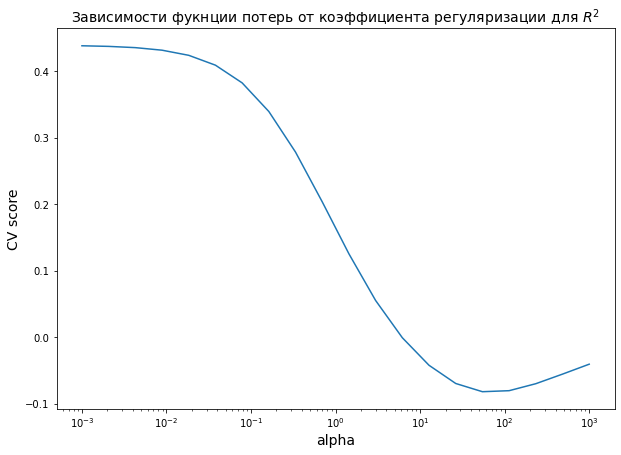

In [1272]:
best_alpha_R2, xx, yy = optimize('r2', X_train, y_train)
plt.figure(figsize=(10, 7))
plt.plot(xx, yy)
plt.xscale("log")
plt.title('Зависимости фукнции потерь от коэффициента регуляризации для $R^2$', fontsize=14)
plt.xlabel('alpha', fontsize=14)
plt.ylabel('CV score', fontsize=14)
print('Лучший коэффициент регуляризации для R2 =', best_alpha_R2)

Посчитаем те же метрики снова и сравним:

In [1277]:
RMSE, MAE, R2 = get_metrics_ridge(X_train, y_train, X_test, y_test)
print('Старые метрики для Ridge-регрессии:')
print(f'RMSE: {RMSE}\nMAE: {MAE}\nR2:{R2}')

Старые метрики для Ridge-регрессии:
RMSE: 37.23000333665353
MAE: 20.606157935044266
R2:-0.03618547362101321


In [1280]:
RMSE, MAE, R2 = get_metrics_ridge(X_train, y_train, X_test, y_test, alpha=best_alpha_MAE)
print('Новые метрики для Ridge-регрессии с коэфф best_alpha_MAE:')
print(f'RMSE: {RMSE}\nMAE: {MAE}\nR2:{R2}')

Новые метрики для Ridge-регрессии с коэфф best_alpha_MAE:
RMSE: 35.41599219216718
MAE: 18.471810468781456
R2:0.062329666590564825


Вывод: стало совсем чуть-чуть лучше, но оно того не стоило.

(С новыми коэфф. для RMSE и R2 результат такой же)

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

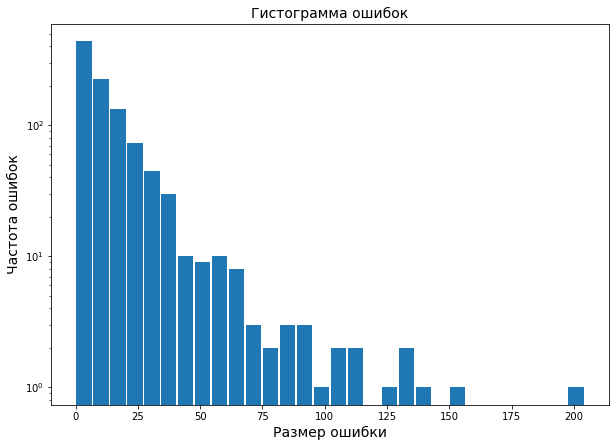

In [1285]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(Ridge(), X_train, y_train)
errors = np.abs(y_train - y_train_predict)

plt.figure(figsize=(10, 7))
plt.title('Гистограмма ошибок', fontsize=14)
plt.ylabel('Частота ошибок', fontsize=14)
plt.xlabel('Размер ошибки', fontsize=14)
plt.hist(errors, bins=30, rwidth=0.9)
plt.yscale('log')

Вывод. Самые частые ошибки - самые маленькие. Чем больше ошибка, тем она реже.